## SETUP

In [1]:
# HOME
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()

# get the code
import sys
sys.path.append('../codeCNV')
from plot import plot_snp

home = '/Users/mahtin'
# home = '/Users/martinscience'
# standard paths
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
static_path = os.path.join(home, "Dropbox/Icke/Work/static")
cluster_path = os.path.join(home, "mount")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")

# load the config
# edit config directly in yaml file
config_file = '../config/config_devel.yaml'
import yaml
with open(config_file) as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    config = yaml.load(file, Loader=yaml.FullLoader)['CNV']['cluster']
    

cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")

# the path to the input data
cnv_path = os.path.join(cnvdata, "cnv")
cnvPON_path = cnv_path = os.path.join(cnvdata, "chromCov")
cnv_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/cnv")
cnvPON_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/chromCov")

In [2]:
cnvPON_path

'/Users/mahtin/mount/scratch/develop/PONcoverage/chromCov'

## get the coverage and SNP data

In [3]:
sample = "01_A"
snp_df = pd.read_csv(os.path.join(output_path, f'rollingCNV/{sample}.snp.csv'), sep='\t').dropna()

### vizualize

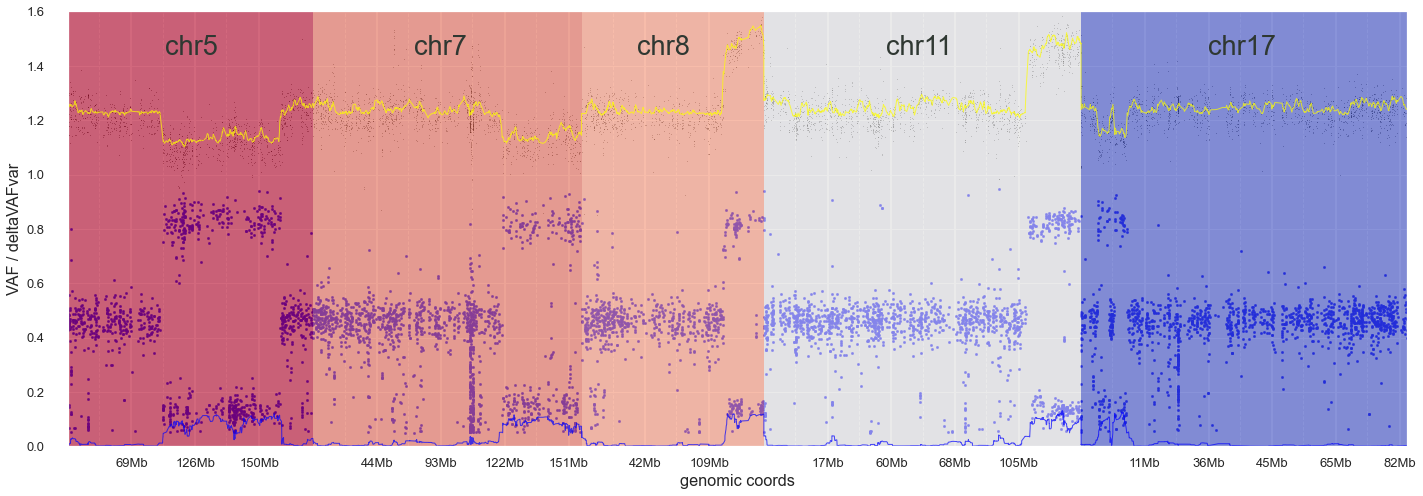

In [4]:
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.2,
            alpha=.7
        )
    )

log2mean = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )
vaf = dict(
        title='VAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='VAF',
        plot_args=dict(
            linewidth=0.5,
            color='blue',
            s=5,
            alpha=1
        ))


absvafmean = dict(
        title='deltaVAFvar',
        plot_type='line',   # ['line', 'scatter']
        data='deltaVAFvar',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        )
    )
deltavafvar = dict(
        title='deltaVAFvar',
        plot_type='line',   # ['line', 'scatter']
        data='deltaVAFvar',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        )
    )

fig_params = dict(
    figsize=(24,8),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(0,1),
    cov_offset=.1,  # how much log2ratio=0 is shifted above SNP-data
    cov_height=.5,
    label_size=13
)
chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']
r1 = 'chr17:3Mb-9Mb'

_ = plot_snp(snp_df, snp_plots=[vaf, deltavafvar], cov_plots=[log2, log2mean], chroms=chroms, region='', **fig_params)

### finding the weird traces

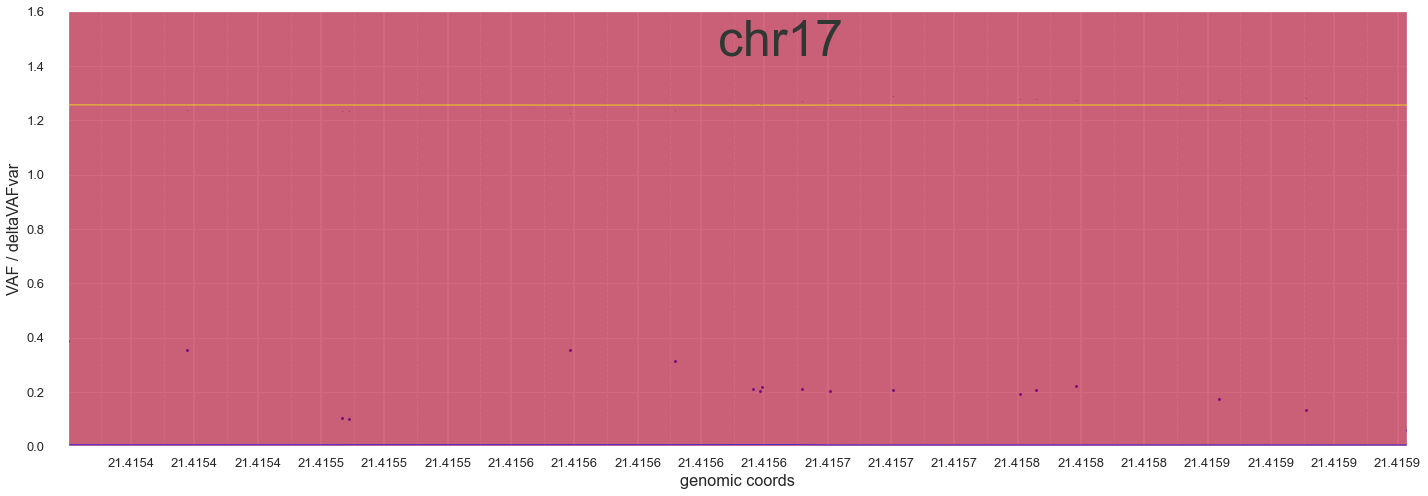

In [13]:
tchroms = ['chr1', 'chr7', 'chr11', 'chr13', 'chr16', 'chr17', 'chr19', 'chr20', 'chr22', 'chrX']
_ = plot_snp(snp_df, snp_plots=[vaf, deltavafvar], cov_plots=[log2, log2mean], chroms=tchroms, region='chr17:21415000-21416000', **fig_params)

In [19]:
snp_df

,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF,absVAF,deltaVAF,absVAFmean,absVAFmeanDiff,VAFstd,VAFstdDiff,deltaVAFvar,deltaVAFvarDiff,deltaVAFstd,deltaVAFstdDiff
18,chr1,1054900,37368,37368,-0.069236,0.346636,3.945632e-03,147.0,0.044,0.421769,0.156462,0.056079,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
19,chr1,1055000,37468,37468,-0.066106,0.346110,3.457801e-03,98.0,0.919,0.489796,0.020408,0.068027,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
20,chr1,1055037,37505,37505,-0.031916,0.346188,3.524551e-03,86.0,0.840,0.476744,0.046512,0.013052,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
21,chr1,1071823,37706,37706,0.337613,0.346937,3.793557e-03,109.0,0.007,0.532110,0.064220,0.055366,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
22,chr1,1291377,55139,55139,0.242629,0.247084,8.714793e-10,182.0,1.818,0.445055,0.109890,0.087055,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24165,chrX,156023260,49469650,1835187,-0.667568,0.212712,0.000000e+00,25.0,0.950,0.880000,0.760000,0.023226,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0
24166,chrX,156023266,49469656,1835193,-0.655721,0.212684,0.000000e+00,25.0,0.930,0.880000,0.760000,0.000000,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0
24167,chrX,156024203,49469886,1835423,0.148033,0.211628,0.000000e+00,53.0,0.392,0.132075,0.735850,0.747925,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0
24168,chrX,156024239,49469922,1835459,0.160322,0.211463,0.000000e+00,56.0,0.203,0.267857,0.464286,0.135782,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0


In [27]:
def ep(region):

    def convert(pos):
        if pos.endswith('Mb'):
            pos = int(float(pos.replace('Mb', '')) * 1e6)
        elif pos.endswith('kb'):
            pos = int(float(pos.replace('kb', '')) * 1000)
        else:
            pos = int(pos)
        return pos

    split = region.split(':')
    chrom = split[0]

    # if start and are used
    if len(split) > 1 and '-' in split[1]:
        se = split[1].split('-')
        start = convert(se[0])
        end = convert(se[1])
    else:
        start = 0
        end = 1e10
    return f'(Chr == "{chrom}" and {start} < Pos < {end})'



In [28]:
chr1 = 'chr1:12790000-12800000'
chr7 = 'chr7:101034000-101036000'
chr17 = 'chr17:21415000-21416000'

bad_query = " or ".join([ep(chrom) for chrom in [chr1, chr7, chr17]])
bad_df = snp_df.query(bad_query)
bad_df

,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF,absVAF,deltaVAF,absVAFmean,absVAFmeanDiff,VAFstd,VAFstdDiff,deltaVAFvar,deltaVAFvarDiff,deltaVAFstd,deltaVAFstdDiff
224,chr1,12794381,439675,439675,-0.063621,0.110704,3.018047e-01,492.0,1.356,0.406504,0.186992,0.081301,0.517105,1.000000,0.132867,0.458093,0.014052,0.044190,0.118665,0.061787
225,chr1,12795495,440060,440060,0.276882,0.108074,2.727070e-01,639.0,1.850,0.051643,0.896714,0.354861,0.535758,0.948872,0.124642,0.111715,0.016579,0.022171,0.128746,0.027306
226,chr1,12795518,440083,440083,0.311345,0.107650,2.686214e-01,700.0,1.389,0.082857,0.834286,0.031214,0.537890,0.858583,0.135703,0.030526,0.016850,0.024456,0.129729,0.029606
227,chr1,12795625,440190,440190,0.522470,0.105164,2.450187e-01,878.0,1.651,0.136674,0.726652,0.053817,0.487198,0.665153,0.145567,0.004267,0.016223,0.013971,0.127484,0.017855
228,chr1,12795695,440260,440260,0.714077,0.103062,2.252051e-01,941.0,1.575,0.206164,0.587672,0.069490,0.444413,0.494281,0.149781,0.000174,0.016031,0.014166,0.126745,0.018280
229,chr1,12795729,440294,440294,0.764329,0.102029,2.158508e-01,920.0,0.183,0.168478,0.663044,0.037686,0.423157,0.404742,0.150095,0.000008,0.016079,0.015607,0.126920,0.020005
230,chr1,12795744,440309,440309,0.784401,0.101574,2.117638e-01,900.0,1.738,0.222222,0.555556,0.053744,0.415878,0.370225,0.150242,0.000043,0.016186,0.017591,0.127314,0.022309
231,chr1,12795749,440314,440314,0.791091,0.101422,2.104014e-01,892.0,1.731,0.219731,0.560538,0.002491,0.401877,0.276642,0.152398,0.000327,0.016415,0.016051,0.128201,0.020186
232,chr1,12795813,440378,440378,0.743692,0.098292,1.906337e-01,738.0,1.667,0.161247,0.677506,0.058484,0.396259,0.197032,0.157457,0.002417,0.016279,0.015465,0.127687,0.019620
233,chr1,12795861,440426,440426,0.654922,0.097291,1.805883e-01,593.0,1.669,0.107926,0.784148,0.053321,0.395222,0.105868,0.160423,0.006644,0.016428,0.017079,0.128241,0.021410


## clustering strategy

+ #### try removing the main cluster using GMM / or adding the cluster label to the parameters
+ #### creating a visualisation for clusters on genomic data
+ #### try half-maximum cutoff for all metrices

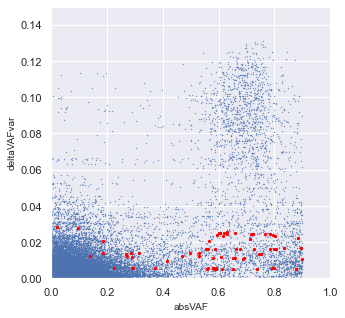

In [63]:
def plot_2d(df, xcol, ycol, df2=pd.DataFrame(), figsize=(5,5)):
    fig, ax = plt.subplots(figsize=figsize)
    _ = ax.scatter(df[xcol], df[ycol], s=.1);
    if len(df2.index):
        _ = ax.scatter(df2[xcol], df2[ycol], s=5, color='red')
    _ = ax.set_xlabel(xcol, fontsize=10)
    _ = ax.set_ylabel(ycol, fontsize=10)
    def get_lims(col):
        if 'log' in col: 
            return (-1,3)
        if 'abs' in col:
            return (0, 1)
        if 'delta' in col:
            return (0,0.15)
        else:
            return (-1,1)
    _ = ax.set_xlim(get_lims(xcol))
    _ = ax.set_ylim(get_lims(ycol))
    
xcol = 'absVAF'
ycol = 'deltaVAFvar'
plot_2d(snp_df, xcol, ycol, df2=bad_df)

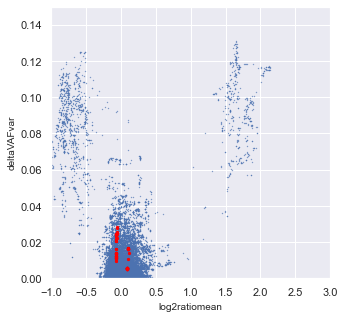

In [64]:
plot_2d(snp_df, 'log2ratiomean', 'deltaVAFvar', df2=bad_df)

### filter out below average
+ make a relative cutoff for all values of special data columns below a certain threshold

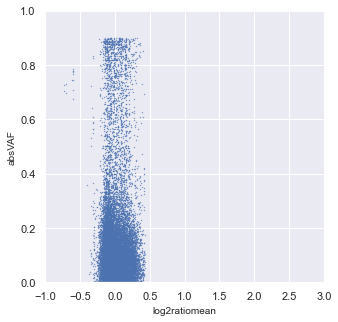

In [65]:
def filter_threshold(snp_df, cols=['log2ratiomean', 'deltaVAFvar'], thresh = 0.3):
    
    df = snp_df.copy()
    df['center'] = True
    mask = df['center']
    for col in cols:
        col_mask = df[col] < thresh * df[col].max()
        mask = mask & col_mask
    df['center'] = mask.astype(int)
    return df

snp_df = filter_threshold(snp_df, thresh=0.2)

filter_df = snp_df[snp_df['center'] == 0]
center_df = snp_df[snp_df['center'] ==1]
plot_2d(center_df, 'log2ratiomean', 'absVAF');

In [ ]:
plt.scatter(center_df['log2ratiomean'], center_df['absVAF'], s=.1);

In [ ]:
absvaf = dict(
        title='absVAF',
        plot_type='scatter',  # ['line', 'scatter']
        data='absVAF',
        plot_args=dict(
            c='dbscan',
            s='dbscan',
            alpha=.5,
            cmap='rainbow'))
_ = plot_snp(filter_df, snp_plots=[vaf, deltavafvar], cov_plots=[log2, log2mean], chroms=chroms, region='', **fig_params)

## DBSCAN for finding the clusters and reducing noise

In [ ]:
from sklearn.cluster import DBSCAN

# get the matrix
allcols = ['log2ratiomean', 'VAF', 'absVAF', 'deltaVAFstd', 'deltaVAFvar', 'VAFstd']
select_cols = ['log2ratiomean', 'absVAF', 'deltaVAFvar']
X = filter_df[select_cols]
rows = X.shape[0]

ep=0.1
ms = int(rows/20)

labels = DBSCAN(eps=ep, min_samples=ms).fit_predict(X)
plt.scatter(X['log2ratiomean'], X['absVAF'], c=labels, s=1, cmap='viridis')
cluster, counts = np.unique(labels, return_counts=True)
cluster_count = len(cluster[cluster != -1])
cluster_size = counts[np.argmax(counts)]
cluster_id = cluster[np.argmax(counts)]
print(f"ep:{round(ep,2)}|min_samples:{ms}>> {cluster_count} clusters | cluster{cluster_id}: {cluster_size}")

In [ ]:
def fit_DBSCAN(X, max_cluster=1, eps=np.logspace(-1,1,10), sample_fracs=np.logspace(-3,-1,10)):
    max_counts = 0
    for sample_frac in sample_fracs:
        for ep in eps:
            # sample_fraction up to all samples if wanted
            ms = min(X.shape[0], int(X.shape[0] * sample_frac))
            model = DBSCAN(eps=ep, min_samples=ms)
            labels = model.fit_predict(X)
            cluster, counts = np.unique(labels, return_counts=True)
            # get the number of clusters 
            cluster_count = len(cluster[cluster != -1])
            # get the size of cluster 0
            #! maybe use better with largest cluster
            cluster_size = counts[np.argmax(counts)]
            if cluster_count:
                if cluster_size > max_counts:
                    best_model = model
                    print(f"Best model: ep:{round(ep,2)}|min_samples:{ms}>> {cluster_count} clusters | cluster0: {cluster_size}")
                    if (cluster_count <= max_cluster):
                        best_limit_model = model      
                        print(f"BEST model: ep:{round(ep,2)}|min_samples:{ms}>> {cluster_count} clusters | cluster0: {cluster_size}")
    return best_model, best_limit_model

In [ ]:
best_model, best_limit_model = fit_DBSCAN(X, max_cluster=3)

In [ ]:
labels = best_model.fit_predict(X)
plt.scatter(X['log2ratiomean'], X['absVAF'], c=labels, s=1, cmap='viridis')

### GMM

In [ ]:
# get the matrix from the df
allcols = ['log2ratiomean', 'VAF', 'absVAF', 'deltaVAFstd', 'deltaVAFvar', 'VAFstd']
select_cols = ['log2ratiomean', 'absVAF', 'deltaVAFvar']
X = filter_df[select_cols]
rows = X.shape[0]
X.shape

+ #### GMM clustering runs best for fitting the center mass
    * clusters vary depending on init clusters

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=3, covariance_type='diag', n_init=20)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    _ = axes[i].scatter(X['log2ratiomean'], X['absVAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

def get_centers(df, runs=25, comps=3, exclude_X=True, cols=['log2ratiomean', 'VAF']):
    '''
    use GMM to identify the center cluster and get the means from that
    because GMM occasionally does not identify the center cluster,
    I let the GMM proceed several times and minimize the center cluster
    next, the center cluster can be identified as the maximum center
    '''
    VAFmin, VAFmax = VAF_limits
    # fit the centers to the data 
    if exclude_X:
        df = df.query('Chr != "chrX"')     
    X = df[cols]

    gmm = GMM(n_components=comps, covariance_type='diag', n_init=runs).fit(X)
    labels = gmm.predict(X)
    # get the size of the 
    cluster_id, counts = np.unique(labels, return_counts=True)
    
    print(cluster_id, counts, gmm.means_)
    maxcount = np.max(counts)
    centers = pd.DataFrame(gmm.means_, columns=['log2ratio', 'VAF'])
    # get mean_cov and meanVAF from largest cluster
    meanCov, meanVAF = centers.loc[np.argmax(counts)]
    size = maxcount
            
    print(f'GMM using {runs} inits: center size {size} meanVAF = {round(meanVAF, 2)} meanCov={round(meanCov, 2)}')
    
    return meanCov, meanVAF, centers

### DBSCAN

In [ ]:
24000 / 200

### loading labels back into df

In [ ]:
snp_df['dbscan'] = labels
snp_df

In [ ]:
snp_df.to_csv(os.path.join(output_path, f'cluster/{sample}.dbscan.csv'), sep='\t', index=False)

In [ ]:
counts[np.argmax(counts)]

+ #### DBSCAN seems to be best fitted for removing the center mass as the spread is hard to guess
    * perform a grid search on eps and min_samples to find the maximum center mass with just one cluster
    * better!: perform this grid search on multi-dimensional data

In [ ]:
np.unique(labels)

In [ ]:
labels = best_limit_model.fit_predict(X)
plt.scatter(X['log2ratiomean'], X['absVAF'], c=labels, s=1, cmap='viridis')

In [ ]:
np.unique(labels)

In [ ]:
snp_df['DBID'] = labels
snp_df

In [ ]:
cnv_df = snp_df.query('DBID > 0')
cnv_df

In [ ]:
fig_params = dict(
    figsize=(24,8),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(0,1),
    cov_offset=.1,  # how much log2ratio=0 is shifted above SNP-data
    cov_height=.5,
    label_size=13
)

log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.2,
            alpha=.7
        )
    )

log2mean = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )

absvaf = dict(
        title='absVAF',
        plot_type='scatter',  # ['line', 'scatter']
        data='absVAF',
        cluster={'DBID', 'blue'}
        plot_args=dict(
            s=1,
            c=snp_df.query('Chr in @chroms')['DBID'],
            alpha=.7
        )
    )

chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']
r1 = 'chr17:3Mb-9Mb'

fig, ax, df, chrom_df = plot_snp(snp_df, snp_plots=[absvaf], cov_plots=[log2, log2mean], chroms=chroms, region='', **fig_params)

+ increasing n_init to 20 does the job:

In [ ]:
choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=3, covariance_type='diag', n_init=25)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    _ = axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))